# Problema - ¿Quién ganará las elecciones?  - Distribuccion Binomial

Tres partidos se presentan a las elecciones presidenciales de un cierto país. Para conocer el estado de opinión de la población y las expectitivas de cada uno, el gobierno encarga una encuesta electoral a una empresa de sociométrica justo antes de la campaña electoral. También pretenden usar el estudio para conocer quién hace mejor campaña electoral.

Carga el fichero `elections.csv` con los resultados de la encuesta. Trataremos de responder a las dos cuestiones.

In [10]:
from google.colab import files
uploaded = files.upload()

Saving elections.csv to elections (1).csv


In [11]:
import io
import pandas as pd
import numpy as np

path = io.BytesIO(uploaded['elections.csv'])
elections_df = pd.read_csv(path, sep=",")
print(elections_df.shape)
elections_df.head()

(3500, 6)


,Unnamed: 0,votes_for_A,votes_for_B,votes_for_C,gender,p_changes_vote
0,1,0,1,0,1,0.062710
1,2,0,0,1,0,0.409047
2,3,0,0,1,1,0.210734
3,4,0,0,1,1,0.304020
4,5,1,0,0,0,0.317170


In [12]:
elections_df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
elections_df.describe()

,id,votes_for_A,votes_for_B,votes_for_C,gender,p_changes_vote
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1750.500000,0.398000,0.155429,0.251714,0.420857,0.203574
std,1010.507298,0.489555,0.362365,0.434060,0.493767,0.205237
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,875.750000,0.000000,0.000000,0.000000,0.000000,0.028705
50%,1750.500000,0.000000,0.000000,0.000000,0.000000,0.144596
75%,2625.250000,1.000000,0.000000,1.000000,1.000000,0.345611
max,3500.000000,1.000000,1.000000,1.000000,1.000000,0.988265


In [26]:
# Veamos las variables categóricas y las numéricas
elections_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3500 non-null   int64  
 1   votes_for_A     3500 non-null   int64  
 2   votes_for_B     3500 non-null   int64  
 3   votes_for_C     3500 non-null   int64  
 4   gender          3500 non-null   int64  
 5   p_changes_vote  3500 non-null   float64
 6   p_vote_correct  3500 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 191.5 KB


**Observaciones:**


*   La información recolectada por la empresa de sociométrica contiene 3500 filas y 6 columnas.
*   Todas las columnas en el dataset son de tipo númerico no tenemos ninguna variable categórica. 
*   Para las columnas ***votes_for_A, votes_for_B y votes_for_C***, los valores corresponden a:  0=No votarian y 1=Si votarian. 
*   La columna ***gender *** contiene dos valores 1 y 0 que corresponden a 1=Female y 0=Male. 
*   La columna ***p_changes_vote*** contiene la probabilidad de cambio de voto de los encuestados. 
*   El dataset se encuentra balanceado  y no se observan columnas con valores faltantes. 

## Parte 1: Interpretación directa de la encuesta

Basándote únicamente en lo declarado por los entrevistados.  

### Calcula las probabilidades de voto de cada uno de los partidos. 
Para cada partido, (casos posibles / total casos) 



In [35]:
# Constants
TOTAL_PEOPLE_IN_SURVEY = len(elections_df)
FEMALE = 1
MALE = 0

In [36]:
# Probabilidad de voto por cada partido (casos posibles / total casos)
prob_per_party = elections_df.loc[:, [
    "votes_for_A", "votes_for_B", 'votes_for_C'
]].mean()

# Probabilidad del voto indeciso, personas que fueron encuestadas y no van a votar por el partido A, B ó C.
total_undecided = elections_df.loc[(elections_df["votes_for_A"] == 0)
                                   & (elections_df["votes_for_B"] == 0)
                                   & (elections_df["votes_for_C"] == 0),
                                   ["id"]].count().mean()

prob_undecided = total_undecided / TOTAL_PEOPLE_IN_SURVEY

print(np.round(prob_per_party, 3))
print(np.round(prob_undecided, 3))

votes_for_A    0.398
votes_for_B    0.155
votes_for_C    0.252
dtype: float64
0.195


### Calcula la probabilidad de voto si se es mujer o si se es hombre. (Probabilidad condicionado que es mujer, y condicionado que es hombre)


In [37]:
def calculate_mean(conditional_col, condition_value):
    mean = len(elections_df.loc[(elections_df[conditional_col]
                                 == condition_value)]) / TOTAL_PEOPLE_IN_SURVEY
    return mean


qty_persons_by_gender = elections_df.groupby('gender').id.count()
print(qty_persons_by_gender)

# Probabilidad de voto por partido si es Mujer
prob_female = calculate_mean('gender', FEMALE)
print("Probabilidad de voto Femenino es: \n{0}".format(np.round(
    prob_female, 3)))

# Probabilidad de voto por partido si es Hombre
prob_male = calculate_mean('gender', MALE)
print("Probabilidad de voto Masculino es: \n{0}".format(np.round(prob_male,
                                                                 3)))

gender
0    2027
1    1473
Name: id, dtype: int64
Probabilidad de voto Femenino es: 
0.421
Probabilidad de voto Masculino es: 
0.579



### Tomando un voto del partido A al azar, ¿cuál es la probabilidad de que provenga de una mujer? ¿Y si el voto es del partido C? (Probabilidad de ser mujer condicionado a que haz votado al partido A) 

In [38]:
prob_vote_fem_a = elections_df[
    (elections_df.gender == FEMALE)
    & (elections_df.votes_for_A == 1)].id.count() / TOTAL_PEOPLE_IN_SURVEY

prob_vote_fem_c = elections_df[
    (elections_df.gender == FEMALE)
    & (elections_df.votes_for_C == 1)].id.count() / TOTAL_PEOPLE_IN_SURVEY

prob_vote_fem_b = elections_df[
    (elections_df.gender == FEMALE)
    & (elections_df.votes_for_B == 1)].id.count() / TOTAL_PEOPLE_IN_SURVEY

prob_vote_fem_a = elections_df[(
    elections_df.votes_for_A == FEMALE)].gender.mean()
prob_vote_fem_c = elections_df[(
    elections_df.votes_for_C == FEMALE)].gender.mean()
prob_vote_fem_b = elections_df[(
    elections_df.votes_for_B == FEMALE)].gender.mean()

print(
    "La probabilidad de que un voto del partido A provenga de una mujer es: {}"
    .format(np.round(prob_vote_fem_a, 3)))
print(
    "La probabilidad de que un voto del partido B provenga de una mujer es: {}"
    .format(np.round(prob_vote_fem_b, 3)))
print(
    "La probabilidad de que un voto del partido C provenga de una mujer es: {}"
    .format(np.round(prob_vote_fem_c, 3)))

La probabilidad de que un voto del partido A provenga de una mujer es: 0.419
La probabilidad de que un voto del partido B provenga de una mujer es: 0.496
La probabilidad de que un voto del partido C provenga de una mujer es: 0.703


## Parte 2: Volatilidad del voto

La columna `p_changes_vote` muestra la probabilidad de que el encuestado termine votando algo distinto a lo declarado. Úsala para determinar la fiabilidad de la encuesta. ¿Es igual de volátil el voto femenino que el masculino?

(La volatilidad del voto)

In [18]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

# Calculate mean of p_changes column grouped by gender
prob_change_by_gender = elections_df.groupby('gender').agg(
    {'p_changes_vote': ['mean', 'count', 'median', 'std']})
print(prob_change_by_gender)

       p_changes_vote                          
                 mean count    median       std
gender                                         
0            0.176870  2027  0.059068  0.211409
1            0.240321  1473  0.215052  0.190467


Para la pregunta es: ¿Es igual de volátil el voto femenino que el masculino? podemos concluir que no podemos responder con base en los valores promedios obtenidos sin antes hacer un constraste de hipótesis. 

Si graficamos los datos de probabilidad de cambio de voto, podemos observar que de acuerdo al gráfico los datos no parecen que provengan de una distribucción normal pero podemos aplicar un test de shapiro para confirmar esta hipótesis. 

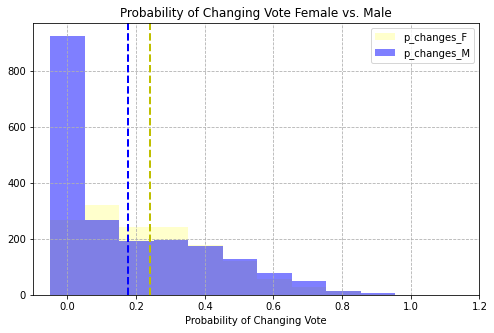

In [19]:
#Get dataframes by gender for p-changes_vote column
fem = elections_df[elections_df['gender'] == FEMALE]['p_changes_vote']
mas = elections_df[elections_df['gender'] == MALE]['p_changes_vote']

plt.figure(figsize=(8, 5))
bins = np.linspace(-10, 10, 200)
plt.hist(fem, bins=bins, alpha=0.2, label="p_changes_F", color=['yellow'])
plt.axvline(fem.mean(), linestyle="--", color='y', linewidth=2)

plt.hist(mas, bins=bins, alpha=0.5, label="p_changes_M", color=['blue'])
plt.axvline(mas.mean(), linestyle="--", color='b', linewidth=2)

plt.xlim([-0.1, 1.2])
plt.title("Probability of Changing Vote Female vs. Male")
plt.grid(linestyle="--")
plt.xlabel("Probability of Changing Vote")
plt.legend()
plt.show()

In [20]:
# Verificar si los datos siguen una distribución normal usando Shapiro Test.
shapiro_test_F = shapiro(fem)
shapiro_test_M = shapiro(mas)

print(shapiro_test_F)
print(shapiro_test_M)

ShapiroResult(statistic=0.9309672713279724, pvalue=1.5714347122869286e-25)
ShapiroResult(statistic=0.8170072436332703, pvalue=3.685414961174269e-43)


La hipótesis nula de un test de Shapiro-Wilk es que los datos proceden de una distibución normal. Con un p-valor tan bajo, rechazamos y conlcuímos que es muy improbable que estos sean datos procedentes de una distribución normal.

Al parecer, las varianzas de los dos grupos son diferentes para comprobarlo vamos a usar un test de **F de Fisher-Snedecor**:

In [21]:
from scipy.stats import f

F = np.var(fem) / np.var(mas)
df1, df2 = prob_change_by_gender['p_changes_vote']['count'][
    MALE] - 1, prob_change_by_gender['p_changes_vote']['count'][FEMALE] - 1
p_value = f.cdf(F, df1, df2)

print(np.min([p_value, 1. - p_value]))

7.341975992327276e-06


El p-valor nos confirma que son muestras procedentes de poblaciones con varianzas distintas. Ello nos impide realizar un t-test para comparar las medias, así que tendremos que recurrir a un test **U de Mann-Whitney**.

In [22]:
mannwhitneyu(fem, mas)

MannwhitneyuResult(statistic=1900615.0, pvalue=5.828969320447167e-44)

## Parte 3: Análisis de campaña

**(a)** Suponiendo que los resultados finales son 

* partido A -> 38.77%,
* partido B -> 15.04%,
* partido C -> 29.16%,

calcula la probabilidad de que, tomado un voto del partido A, éste provenga de un entrevistado que declaró querer votar al partido A. Haz lo mismo con los partidos B y C.

Se utiliza teorema de Bayes donde: 
$$𝑃(𝐵/𝐴)∗𝑃(𝐴)=𝑃(𝐴/𝐵)∗𝑃(𝐵)$$
De esta forma:  $$𝑃(𝑣𝑜𝑡e𝐴/say𝐴)∗𝑃(say𝐴)=𝑃(say𝐴/𝑣𝑜𝑡e𝐴)∗𝑃(𝑣𝑜𝑡e𝐴)$$
Dado que se quiere calcular $$P(sayA/𝑣𝑜𝑡eA)$$
Entonces:  $$𝑃(𝑣𝑜𝑡e𝐴/say𝐴)=(𝑃(𝑣𝑜𝑡e𝐴say𝐴) * 𝑃(𝑣𝑜𝑡e𝐴))/𝑃(say𝐴) $$

In [39]:
# Resultados finales por partido
prob_final_A = 0.3877
prob_final_B = 0.1504
prob_final_C = 0.2916

# New column p_vote_correct.  It calculates the probability of vote for a party giving the probability of changing vote.
elections_df['p_vote_correct'] = 1 - elections_df['p_changes_vote']

prob_voteA_if_sayA = elections_df[elections_df["votes_for_A"] ==
                                  1].p_vote_correct.mean()
prob_voteB_if_sayB = elections_df[elections_df["votes_for_B"] ==
                                  1].p_vote_correct.mean()
prob_voteC_if_sayC = elections_df[elections_df["votes_for_C"] ==
                                  1].p_vote_correct.mean()


def get_probability(column_name_cond, party_results, prob_real_vote):
    # Probabilidad de voto por cada partido
    prob_per_party = elections_df.loc[:, [
        "votes_for_A", "votes_for_B", 'votes_for_C'
    ]].mean()
    prob = (prob_real_vote * prob_per_party[column_name_cond]) / party_results

    return print("La probabilidad de voto del partido {} es: {}".format(
        column_name_cond, np.round(prob, 4)))


p_say_A_if_vote_A = get_probability('votes_for_A', prob_final_A,
                                    prob_voteA_if_sayA)
p_say_A_if_vote_B = get_probability('votes_for_B', prob_final_B,
                                    prob_voteB_if_sayB)
p_say_A_if_vote_C = get_probability('votes_for_C', prob_final_C,
                                    prob_voteC_if_sayC)

La probabilidad de voto del partido votes_for_A es: 0.6602
La probabilidad de voto del partido votes_for_B es: 0.9818
La probabilidad de voto del partido votes_for_C es: 0.6789


**(b)** Suponiendo que el estado reparte 10 millones de euros en subvenciones a cada partido en función de sus resultados electorales y que cada partido invirtió en la campaña las cantidades siguientes

* partido A -> 3.8 millones,
* partido B -> 1.47 millones,
* partido C -> 2.31 millones,

calcula cuánto esperaban ganar con las subvenciones y termina deduciendo quién hizo mejor campaña electoral.

In [40]:
# El total de subvenciones otorgado por el gobierno
subsidized = 10000000

# El total del dinero invertido en campana por cada partido
investment_a = 3800000
investment_b = 1470000
investment_c = 2310000

# Beneficio tomando la subvencion recibida - la inversión realizada en campana.
probA = prob_voteA_if_sayA * prob_per_party["votes_for_A"]
probB = prob_voteB_if_sayB * prob_per_party["votes_for_B"]
probC = prob_voteC_if_sayC * prob_per_party["votes_for_C"]

data = [{
    'Partido': 'Partido A',
    'Inversion': investment_a,
    'Prob. Final': prob_final_A,
    'Prob. Encuesta': probA
}, {
    'Partido': 'Partido B',
    'Inversion': investment_b,
    'Prob. Final': prob_final_B,
    'Prob. Encuesta': probB
}, {
    'Partido': 'Partido C',
    'Inversion': investment_c,
    'Prob. Final': prob_final_C,
    'Prob. Encuesta': probC
}]

final_results_df = pd.DataFrame(data, index=['1', '2', '3'])
final_results_df["Valor Recibido"] = (subsidized *
                                      final_results_df['Prob. Final'])
final_results_df["Valor Esperado"] = (subsidized *
                                      final_results_df['Prob. Encuesta'])
final_results_df["Dif. recibido-esperado"] = final_results_df[
    'Valor Recibido'] - final_results_df['Valor Esperado']
final_results_df["Ganancia Final (Recibido-Inversión)"] = final_results_df[
    'Valor Recibido'] - final_results_df['Inversion']
final_results_df.set_index('Partido')
final_results_df["% (Recibido/Esperado)"] = ((final_results_df['Valor Recibido']*100)/final_results_df['Valor Esperado'])-100

## Conclusiones 

La encuesta electoral fue realizada a 3.500 personas. La población encuestada se divide así: 

         * Mujeres 1.473 
         * Hombres 2.027 
               
**Interpretación directa de la encuesta** 

***1.*** La probabilidad de voto por cada partido es:

         * Partido A: 0.398 
         * Partido B: 0.155 
         * Partido C: 0.252
         
***2.*** La probabilidad de voto en blanco es ó el voto indeciso. 

         * Indecisos:  0.195 
         
         
***3.*** La probabilidad de voto femenino y masculino se divide de la siguiente manera: 

        * Probabilidad de voto Femenino es:  0.421
        * Probabilidad de voto Masculino es: 0.579
        
***4.*** La probabilidad de ser mujer y votar por el partido A, B ó C es: 

        * Partido A: 0.419
        * Partido B: 0.496
        * Partido C: 0.703        

**Volatilidad del voto**

***5.*** La probabilidad de cambio de votos por género es la siguiente: 
   
        * Prob. cambio de voto Masculino:  0.177
        * Prob. cambio de voto Femenino:   0.240
        
Según los datos podemos observar que el voto femenino es mas volátil que el voto Masculino, pero para poder contestar esta pregunta debemos realizar un contraste de hipótesis. 

Primero verificamos que los datos sigan un distribucción normal, para esto hemos utilizado un histograma el cual nos indica que la muestra no sigue una distribucción normal para reforzar esta hipótesis hemos realizado un shapiro test cuyo resultado nos indicó que efectivamente no sigue una distribucción normal.  

Por esta razón se escogió el test de U-Whitman para comparar las dos medias y responder a la pregunta **¿Es igual de volátil el voto femenino que el masculino?**. 

Los planteamientos para el test son los siguientes: 

$$H_0: \mu volatilidad voto F  =  \mu volatilidad voto M \\ 
H_1: \mu volatilidad voto F  \neq \mu volatilidad voto M  \\ 
$$

$$
\alpha = 0.05
p-value < 0.05 = Rechazar H_0
$$

El test de U-Whitman nos da como resultado un p-value de **5.828969320447167e-44**, al ser menor que el nivel de significancia de 0.05 podriamos decir que con un riesgo de 5.828969320447167e-44 existe una diferencia entre la volátilidad del voto Femenino y Masculino.  Por lo tanto las diferencias en las medias que hemos observado nos indica que el voto Femenino es más volátil que el voto Masculino. 

***Análisis de campaña***

La probabilidad de que un voto del partido A este provenga de un entrevistado que declaró querer votar por el partido A es: 
          
          Partido A: 0.6602

La probabilidad de que un voto del partido B provenga de un entrevistado que declaró querer votar por el partido B es: 
          
          Partido B: 0.9818

La probabilidad de que un voto del partido C provenga de un entrevistado que declaró querer votar por el partido C es: 
            
          Partido C: 0.6789
          
**Cuál partido hizo mejor campaña electoral.?**
         

In [25]:
final_results_df.head()

,Partido,Inversion,Prob. Final,Prob. Encuesta,Valor Recibido,Valor Esperado,Dif. recibido-esperado,Ganancia Final (Recibido-Inversión),% (Recibido/Esperado)
1,Partido A,3800000,0.3877,0.255944,3877000.0,2.559439e+06,1.317561e+06,77000.0,51.478524
2,Partido B,1470000,0.1504,0.147659,1504000.0,1.476593e+06,2.740685e+04,34000.0,1.856087
3,Partido C,2310000,0.2916,0.197966,2916000.0,1.979655e+06,9.363447e+05,606000.0,47.298373


De acuerdo con la información presentada en la tabla podemos concluir lo siguiente: 

1. El partido A incrementó el valor final esperado en un 51%. 
2. El partido A fue el partido que invirtió más dinero en la campaña electoral. 
3. El partido A tenia la probabilidad de voto más alta según las encuestas y fue el partido que obtuvó el mayor porcentaje final de votos. 
4. El partido C incrementó el valor final esperado en un 47% y fue el partido que mayor ganancia final recibió y el segundo que realizó mayor inversión. 

Podriamos concluir que los tres partidos realizaron buenas campañas electorales ya que los porcentajes de votantes finales aumentaron con referencia a los valores de la encuesta.  Sin embargo de los tres partidos, el Partido A fue el que mayor aumento de votantes obtuvó ya que pasó de un porcentaje según la encuesta de 25.59% a un resultado final de 38.77%.   Esto le permitió aumentar el valor estimado en un 51.47% y obtener una ganancia final de 77.000 Euros. 